In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from src.definitions import ROOT_DIR
from src.visualization.visualize import plot_ecdf

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
plt.style.use('seaborn-poster')

# Load train data

In [4]:
train_path = ROOT_DIR / 'data/external' / 'CSV_train.csv'

assert train_path.is_file()

In [5]:
data = pd.read_csv(train_path, sep=';')

In [6]:
data.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
425934,25/8-7,1383.935115,475895.84375,6593126.5,-1358.935059,HORDALAND GP.,Skade Fm.,12.676388,0.721565,0.735332,...,59.735497,NaN,0.426387,NaN,0.152180,0.390943,NaN,NaN,65000,1.0
391090,25/7-2,2144.056000,454799.93750,6571036.5,-2118.864746,ROGALAND GP.,Balder Fm.,19.541033,4.513279,1.778738,...,9.642228,NaN,2.063734,-0.014569,NaN,3.531048,NaN,3.540649,99000,3.0
826558,34/11-2 S,2825.008000,466814.34375,6788233.5,-2799.384766,SHETLAND GP.,Tryggvason Fm.,17.668983,NaN,1.410848,...,NaN,NaN,NaN,0.001000,NaN,NaN,15.8008,-999.000000,65000,1.0
487648,29/6-1,4124.233001,444476.25000,6711948.5,-4093.418701,VIKING GP.,Heather Fm.,8.927869,0.276730,2.594840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000,1.0
520618,30/6-5,691.642400,497437.25000,6728313.0,-666.639893,NORDLAND GP.,NaN,15.202856,2.709520,2.243509,...,1102.362183,NaN,NaN,NaN,NaN,NaN,NaN,2.724755,65000,1.0
962851,35/11-1,1042.865123,535629.25000,6783529.5,-1017.836914,HORDALAND GP.,Utsira Fm.,19.031273,NaN,1.123639,...,NaN,NaN,NaN,0.027685,NaN,NaN,NaN,NaN,65000,1.0
306714,25/3-1,3511.920000,487284.96875,6643980.0,-3489.244141,DUNLIN GP.,Sleipner Fm.,8.687500,6.630687,4.394643,...,25.995975,NaN,0.429688,0.010274,2.156875,6.729173,NaN,6.745062,65000,1.0
721488,33/9-1,1530.730000,437780.34375,6791573.5,-1505.729980,HORDALAND GP.,Utsira Fm.,NaN,NaN,0.717212,...,NaN,NaN,NaN,-0.119944,NaN,NaN,NaN,NaN,65000,1.0
354676,25/5-4,1782.952305,470378.62500,6608157.5,-1757.635376,HORDALAND GP.,Grid Fm.,15.424973,NaN,0.906755,...,NaN,NaN,3.174974,0.052272,NaN,NaN,NaN,-999.900024,65000,1.0
144488,16/4-1,1087.993604,449948.90625,6500257.5,-1062.859375,HORDALAND GP.,Utsira Fm.,15.654884,1.061192,1.070123,...,0.977116,NaN,0.904617,-0.002354,0.140197,NaN,NaN,NaN,65000,1.0


In [7]:
data.shape

(1170511, 29)

## Raw features

In [8]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

# GR distribution per well

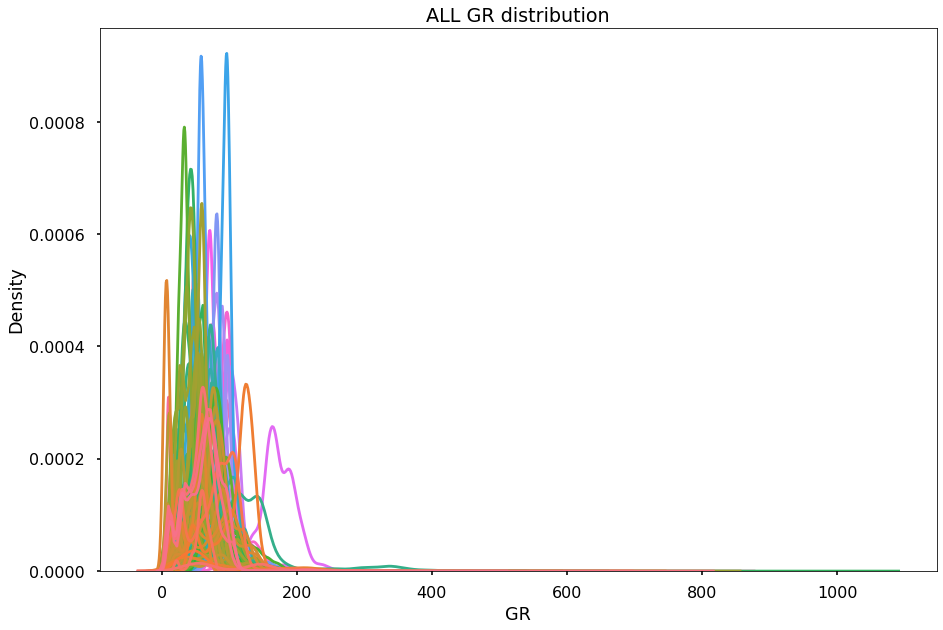

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.kdeplot(data=data,
            x='GR',
            hue='WELL',
            common_norm=True,
            fill=False,
            legend=False,
            ax=ax)

plt.title('All GR distribution')

plt.show()

Quantile 5.0%: 23.75
Quantile 95.0%: 126.83


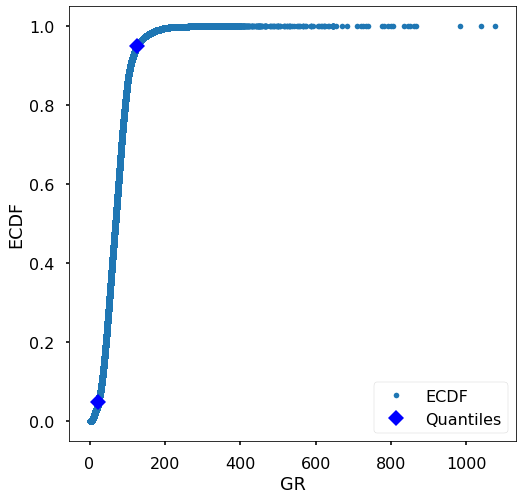

In [38]:
plot_ecdf(data['GR'], 'GR', quantiles=[0.05, 0.95])

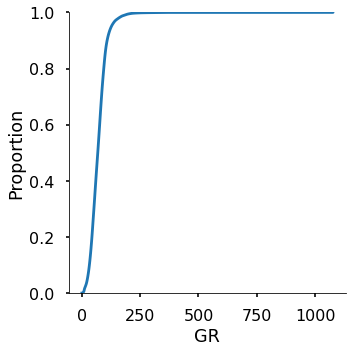

In [28]:
sns.displot(data=data, x='GR', kind='ecdf')

In [43]:
data['GROUP'].value_counts(normalize=True, dropna=False)

HORDALAND GP.       0.250450
SHETLAND GP.        0.199937
VIKING GP.          0.112770
ROGALAND GP.        0.112723
DUNLIN GP.          0.101738
NORDLAND GP.        0.095249
CROMER KNOLL GP.    0.044698
BAAT GP.            0.030605
VESTLAND GP.        0.022312
HEGRE GP.           0.011886
ZECHSTEIN GP.       0.010455
BOKNFJORD GP.       0.002670
ROTLIEGENDES GP.    0.002385
NaN                 0.001092
TYNE GP.            0.001029
Name: GROUP, dtype: float64

In [49]:
cond = data['GROUP'] == 'HORDALAND GP.'

df = data.loc[cond, :]

In [50]:
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
4267,15/9-13,1143.1120,437640.81250,6470976.0,-1118.063232,HORDALAND GP.,Utsira Fm.,18.375000,NaN,1.069017,...,143.330673,NaN,NaN,-0.002985,0.131809,NaN,NaN,NaN,65000,1.0
4268,15/9-13,1143.2640,437640.81250,6470976.0,-1118.215210,HORDALAND GP.,Utsira Fm.,18.278408,NaN,1.068086,...,448.720093,NaN,NaN,-0.003842,0.131809,NaN,NaN,NaN,65000,1.0
4269,15/9-13,1143.4160,437640.81250,6470976.0,-1118.367188,HORDALAND GP.,Utsira Fm.,18.658718,NaN,1.039512,...,498.149078,NaN,NaN,-0.000292,0.131809,NaN,NaN,NaN,65000,1.0
4270,15/9-13,1143.5680,437640.81250,6470976.0,-1118.519165,HORDALAND GP.,Utsira Fm.,19.431723,NaN,0.975084,...,499.783722,NaN,NaN,0.022891,0.131809,NaN,NaN,NaN,65000,1.0
4271,15/9-13,1143.7200,437640.81250,6470976.0,-1118.671143,HORDALAND GP.,Utsira Fm.,19.159428,NaN,0.916610,...,539.977722,NaN,NaN,0.044334,0.131809,NaN,NaN,NaN,30000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163743,7/1-1,2084.2888,450384.15625,6406642.0,-2050.182129,HORDALAND GP.,NaN,13.995625,0.454074,0.449650,...,0.804477,NaN,1.745626,NaN,1.449899,NaN,NaN,NaN,65000,2.0
1163744,7/1-1,2084.4408,450384.15625,6406642.0,-2050.334229,HORDALAND GP.,NaN,13.931362,0.447711,0.445759,...,0.778614,NaN,1.681363,NaN,1.449899,NaN,NaN,NaN,65000,2.0
1163745,7/1-1,2084.5928,450384.12500,6406642.0,-2050.486084,HORDALAND GP.,NaN,13.980016,0.445989,0.442753,...,0.702631,NaN,1.730015,NaN,1.449899,NaN,NaN,NaN,65000,2.0
1163746,7/1-1,2084.7448,450384.12500,6406642.0,-2050.638184,HORDALAND GP.,NaN,14.144194,0.448982,0.447234,...,0.647841,NaN,1.894193,NaN,1.449899,NaN,NaN,NaN,65000,2.0


In [60]:
df.groupby('WELL')['GR'].count()['31/2-19 S']

314

In [51]:
low_gr, high_gr = 24, 127

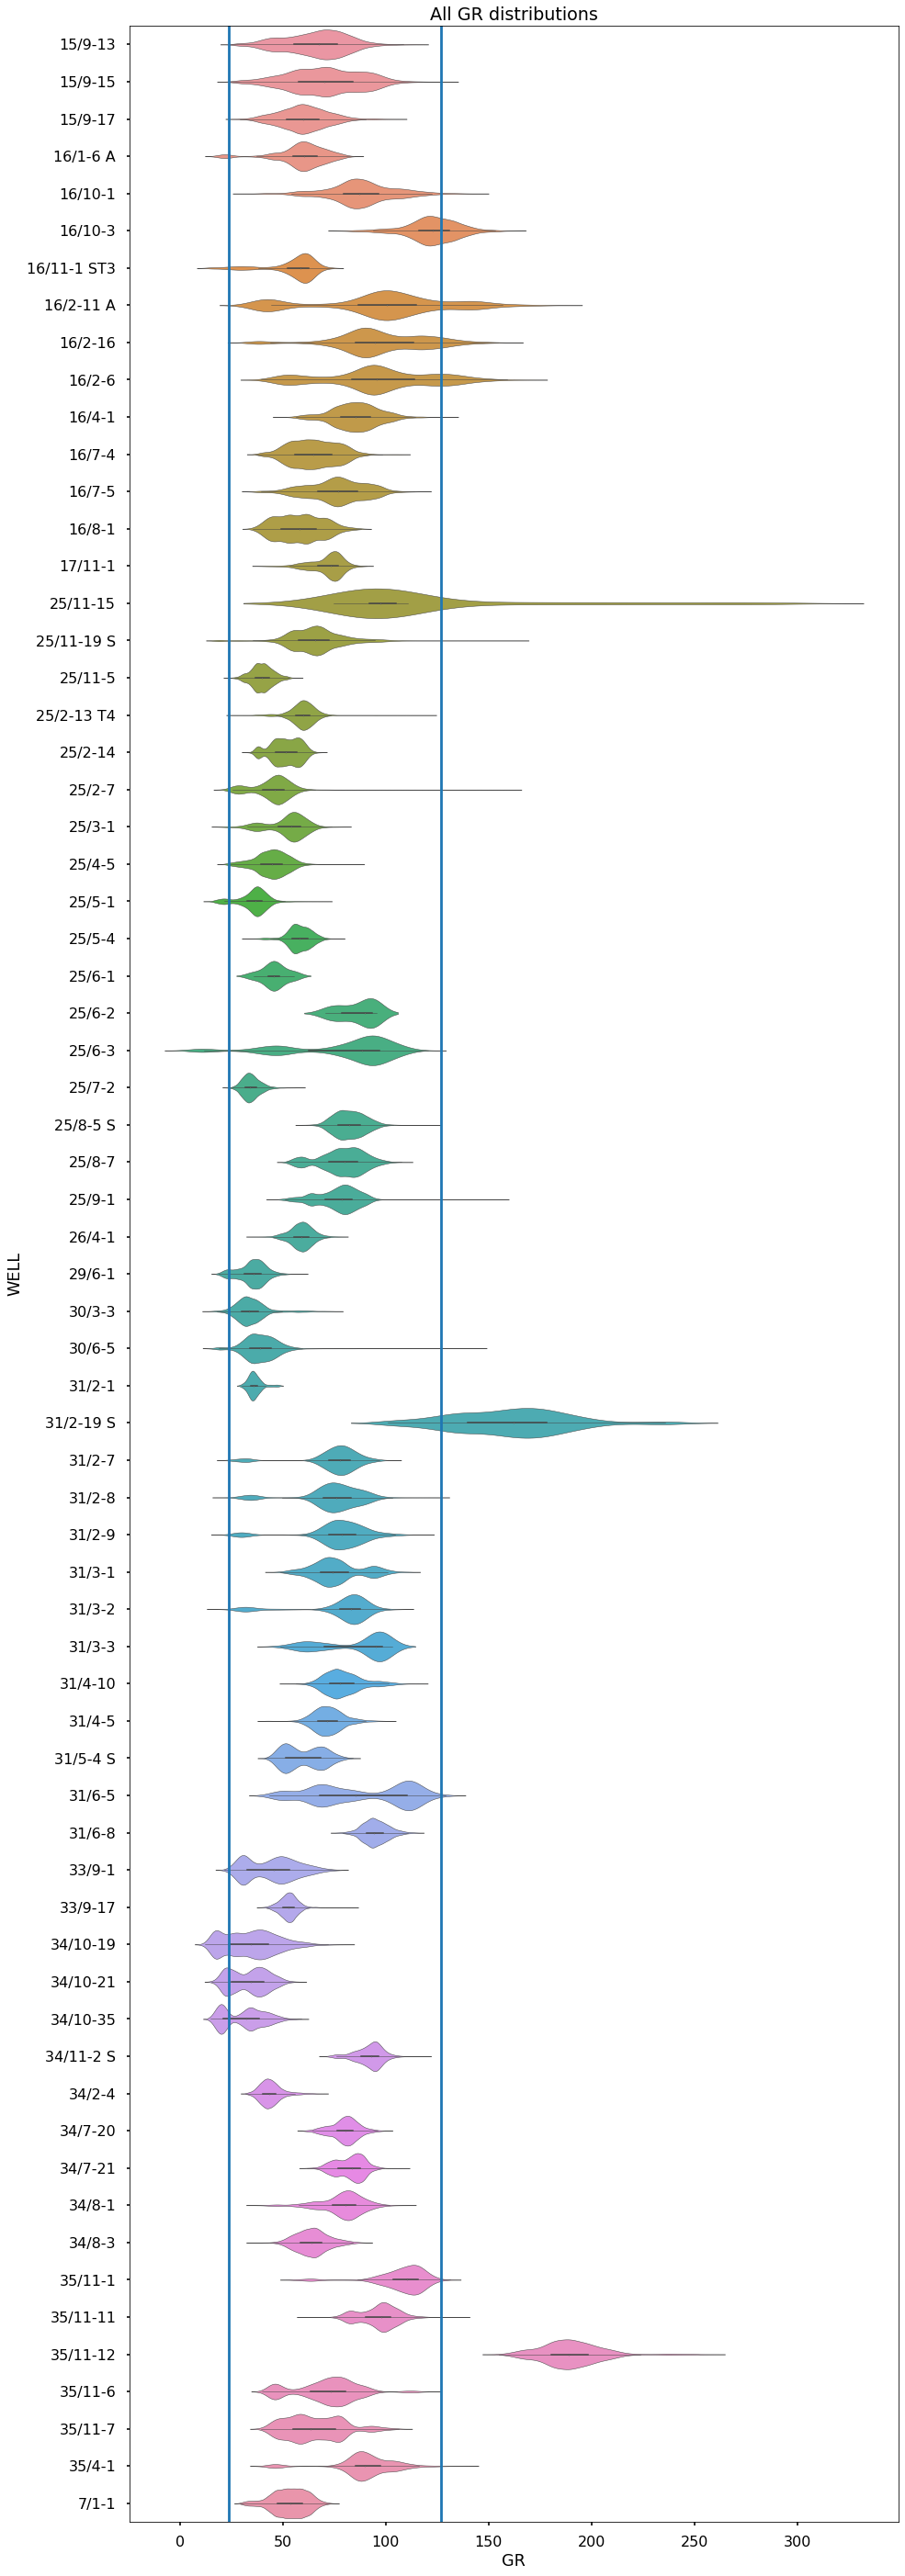

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15, 50))

sns.violinplot(data=df,
               x='GR',
               y='WELL',
               common_norm=False,
               scale="width",
               fill=False,
               legend=False,
               linewidth=0.5,
               ax=ax)

plt.axvline(x=low_gr)
plt.axvline(x=high_gr)


plt.title('All GR distributions')

plt.show()